<img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png">

# Trade inspection

This notebook shows how to inspect individual trades.

First, we can load the transactions and identify a trade to look at. First we load transactions for a particular month:

In [3]:
from quantrocket.zipline import ZiplineBacktestResult
result = ZiplineBacktestResult.from_csv("sell_gap_backtest_results.csv")
transactions = result.transactions

# Set UTC to America/New_York time for convenience
transactions = transactions.tz_convert("America/New_York").tz_localize(None)
transactions.loc["2020-08"]

column,amount,order_id,price,sid,symbol,txn_dollars
date,,,,,,
2020-08-06 09:41:00,-941,b37e9142b1cb4d80bfe0feb2242a1a86,53.280,Equity(FIBBG000D898T9 [CAH]),Equity(FIBBG000D898T9 [CAH]),50136.480
2020-08-06 09:41:00,-1318,1b7c9a2b70a84d08b4ac2c800e94be17,37.900,Equity(FIBBG000BWNFZ9 [WDC]),Equity(FIBBG000BWNFZ9 [WDC]),49952.200
2020-08-06 15:56:00,941,9a6251a67c174fb4a378e5d4bd47a6cd,53.000,Equity(FIBBG000D898T9 [CAH]),Equity(FIBBG000D898T9 [CAH]),-49873.000
2020-08-06 15:56:00,1318,0204a8d4f9164cc69d69270ce72931ac,37.295,Equity(FIBBG000BWNFZ9 [WDC]),Equity(FIBBG000BWNFZ9 [WDC]),-49154.810
2020-08-07 09:41:00,-142,2530514eccee4c00b91008da2d0dedc8,350.695,Equity(FIBBG000DSMS70 [ILMN]),Equity(FIBBG000DSMS70 [ILMN]),49798.690
2020-08-07 09:41:00,-409,4c208efebf9a4502a2f11f25f1435a29,121.770,Equity(FIBBG000BGZT72 [AYX]),Equity(FIBBG000BGZT72 [AYX]),49803.930
2020-08-07 09:41:00,-209,d85eaa642ce44d36aa90302e73933887,237.735,Equity(FIBBG000GPXKX9 [FLT]),Equity(FIBBG000GPXKX9 [FLT]),49686.615
2020-08-07 09:41:00,-389,d135a1b4920e4800b6ebf64dfa14abed,128.510,Equity(FIBBG000BCMBG4 [FTNT]),Equity(FIBBG000BCMBG4 [FTNT]),49990.390
2020-08-07 09:41:00,-480,fcb08b96dfcc48608817adf351d2a599,104.165,Equity(FIBBG000R5HWZ1 [XLRN]),Equity(FIBBG000R5HWZ1 [XLRN]),49999.200


Let's pick a single stock, CSCO:

In [4]:
SID = "FIBBG000C3J3C9"
DATE = "2020-08-13"

trade = transactions[transactions.symbol.str.contains(SID)].loc[DATE]
trade

column,amount,order_id,price,sid,symbol,txn_dollars
date,,,,,,
2020-08-13 09:41:00,-1160,e240d4a081b0481f9c366537829ce8cf,43.028,Equity(FIBBG000C3J3C9 [CSCO]),Equity(FIBBG000C3J3C9 [CSCO]),49912.48
2020-08-13 15:56:00,1160,481c76354a2c46779d5cee7596305087,42.760,Equity(FIBBG000C3J3C9 [CSCO]),Equity(FIBBG000C3J3C9 [CSCO]),-49601.60


We use the data object to load minutes prices for this sid and date, looking back 390 minutes from the session close to get the entire trading day:

In [20]:
from zipline.research import get_data, sid
data = get_data(f"{DATE} 16:00:00")

minute_prices = data.history(sid(SID), "close", 390, "1m")

# Zipline timestamps are in UTC, convert to New York time for convenience
minute_prices.index = minute_prices.index.tz_convert("America/New_York").tz_localize(None)

Then we plot the minute prices and add trade markers for our buy and sell transactions:

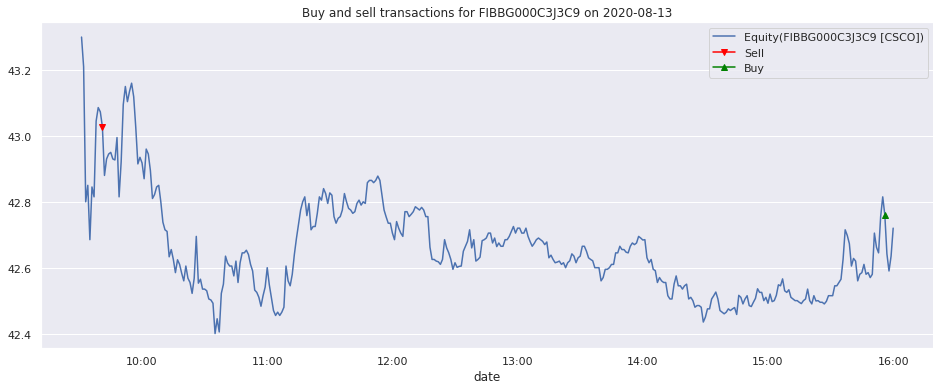

In [21]:
# Plot minute prices
ax = minute_prices.plot(title=f"Buy and sell transactions for {SID} on {DATE}")
    
# Add the trade markers
trade[trade.amount<0].price.plot(ax=ax, marker="v", color="red", label="Sell")
trade[trade.amount>0].price.plot(ax=ax, marker="^", color="green", label="Buy")

ax.legend()

***

## *Next Up*

Part 7: [Broker-Specific Steps for Live Trading](Part7-Broker-Specific-Steps.ipynb)